# QR factorization

Let $A \in \mathbb{C}^{m \times n}, \; m > n$ be a complex rectangular matrix.
Then there exists its QR factorization
$$
A = QR,
$$
where columns of Q are orthogonal $Q^*Q = I$ and $R$ is upper triangular. 

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from numba import jit

In [239]:
n = 500
m = 1000
A = np.zeros((m, n), dtype=np.complex128)
A.real = np.random.randn(m, n)
A.imag = np.random.randn(m, n)
# A = np.random.rand(m, n)

In [240]:
Q, R = np.linalg.qr(A)
np.linalg.norm(A - Q.dot(R))

8.0217201474812237e-13

In [241]:
print(Q.shape)
print(R.shape)

(1000, 500)
(500, 500)


In [242]:
def QR_MGS(A):
    m, n = A.shape
    if m <= n:
        Q = np.zeros((m, m), dtype=A.dtype)
        R = np.zeros_like(A)
    else:
        Q = np.zeros_like(A)
        R = np.zeros((n, n), dtype=A.dtype)
    V = A.copy()
    for i in range(min(m, n)):
        R[i, i] = np.linalg.norm(V[:, i])
        Q[:, i] = V[:, i] / R[i, i]
        for j in range(i+1, n):
            R[i, j] = Q[:, i].conj().dot(V[:, j])
            V[:, j] = V[:, j] - R[i, j] * Q[:, i]
    return Q, R

In [279]:
Q_mgs, R_mgs = QR_MGS(A)
print(Q_mgs.shape, R_mgs.shape)
print(np.linalg.norm(A - Q_mgs.dot(R_mgs)))

(1000, 500) (500, 500)
7.20516414212e-13


In [253]:
%timeit QR_MGS(A)

3.63 s ± 233 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


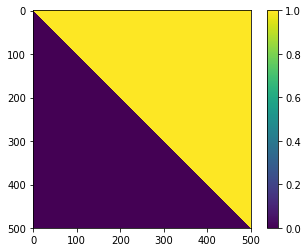

In [244]:
plt.imshow(R_mgs.real != 0)
plt.colorbar()

In [245]:
np.linalg.norm(Q_mgs.conj().T.dot(Q_mgs).real - np.eye(Q_mgs.shape[1]))

1.6062635260146115e-14

In [277]:
def QR_House(A):
    m, n = A.shape
    Q = np.eye(m, dtype=A.dtype)
    R = A.copy()
    for i in range(min(n, m)):
        y = R[i:, i].copy()
        s = y[0] / np.linalg.norm(y[0])
        norm = np.linalg.norm(y)
        y[0] += s * norm
        w = y / np.linalg.norm(y)
        w = np.reshape(w, (w.shape[0], 1))
        wTR = w.conj().T.dot(R[i:, i:])
        R[i:, i:] = R[i:, i:] - 2 * w.dot(wTR)
        Qw = Q[:, i:].dot(w)
        Q[:, i:] = Q[:, i:] - 2 * Qw.dot(w.conj().T) 
    return Q, R

In [278]:
Q_h, R_h = QR_House(A)
print(Q_h.shape, R_h.shape)
print(np.linalg.norm(Q_h.dot(R_h) - A))

(1000, 1000) (1000, 500)
2.47500169729e-12


In [267]:
%timeit QR_House(A)

8.03 s ± 147 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


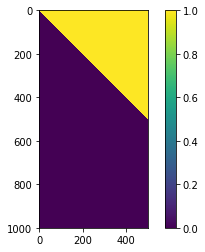

In [248]:
plt.imshow(abs(R_h.real) > 1e-10)
plt.colorbar()

In [249]:
np.linalg.norm(Q_h.conj().T.dot(Q_h).real - np.eye(Q_h.shape[1]))

5.704003156698151e-14